In [ ]:
import tensorflow as tf

# Check if GPU is available
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
print('''
In this project we have folder structure like this
preprocessing/           # Preprocessed data
    original/            # Step 1: Raw images, untouched
        class_0/
        class_1/
    splitted/            # Step 2:Split 70 % train, 15 % test, 15 % validation
        train/
          class_0/
          class_1/
        test/
          class_0/
          class_1/
        validation/
          class_0/
          class_1/
    augmented_train/  # Step 3: Augmentasi
        major_class/
        minor_class/

Note : Folder structure ini hanya berlaku jika terdapat class imbalance
''')


In this project we have folder structure like this
preprocessing/           # Preprocessed data
    original/            # Step 1: Raw images, untouched
        class_0/
        class_1/
    splitted/            # Step 2:Split 70 % train, 15 % test, 15 % validation
        train/
          class_0/
          class_1/
        test/
          class_0/
          class_1/
        validation/
          class_0/
          class_1/
    augmented_train/  # Step 3: Augmentasi
        major_class/
        minor_class/

Note : Folder structure ini hanya berlaku jika terdapat class imbalance



In [ ]:
import os

drive_path = "/content/drive/MyDrive/Datasets/Flower"

target_folder = os.listdir(drive_path)

target_folder

['rose', 'dandelion', 'daisy', 'sunflower', 'tulip']

In [ ]:
classes = []

for i in range(len(target_folder)):
  classes.append(os.path.join(drive_path, target_folder[i]))

classes

['/content/drive/MyDrive/Datasets/Flower/rose',
 '/content/drive/MyDrive/Datasets/Flower/dandelion',
 '/content/drive/MyDrive/Datasets/Flower/daisy',
 '/content/drive/MyDrive/Datasets/Flower/sunflower',
 '/content/drive/MyDrive/Datasets/Flower/tulip']

In [ ]:
names  = target_folder
for i in range(len(names)):
  print(f"{names[i]} : {len(os.listdir(classes[i]))} files")

rose : 784 files
dandelion : 1055 files
daisy : 769 files
sunflower : 734 files
tulip : 984 files


In [ ]:
file_counts = [len(os.listdir(folder)) for folder in classes]
max_files = max(file_counts)

print("Folder differences compared to the major folder:")
for name, count in zip(names, file_counts):
   if count != max_files:
    difference = max_files - count
    print(f"{name}: {difference} differences")

Folder differences compared to the major folder:
rose: 271 differences
daisy: 286 differences
sunflower: 321 differences
tulip: 71 differences


In [ ]:
from IPython.display import display, Math

# Display the LaTeX formula
display(Math(r'\text{Imbalance Ratio} = \frac{\text{Size of Smaller Class}}{\text{Size of Larger Class}}'))

<IPython.core.display.Math object>

In [ ]:
def ratio_summary(min_value, max_value):
    ratio_val = min_value / max_value
    if 1.0 <= ratio_val <= 1.5:
        return "No Action - Mild Imbalance"
    elif 1.5 < ratio_val <= 2.0:
        return "Light down/up sampling"
    elif 2.0 < ratio_val <= 2.5:
        return "Aggressive down/up sampling"
    else:
        return "Severe imbalance - Consider alternative techniques"

def summarize_class_imbalance(classes):
    if len(classes) < 2:
        return "Error! Minimum 2 classes required"

    min_val = min(classes)
    max_val = max(classes)

    action = ratio_summary(min_val, max_val)
    return f"Class Imbalance Summary:\n- Min: {min_val} files\n- Max: {max_val} files\n- Action: {action}"


In [ ]:
summary = summarize_class_imbalance(file_counts)
print(summary)

Class Imbalance Summary:
- Min: 734 files
- Max: 1055 files
- Action: Severe imbalance - Consider alternative techniques


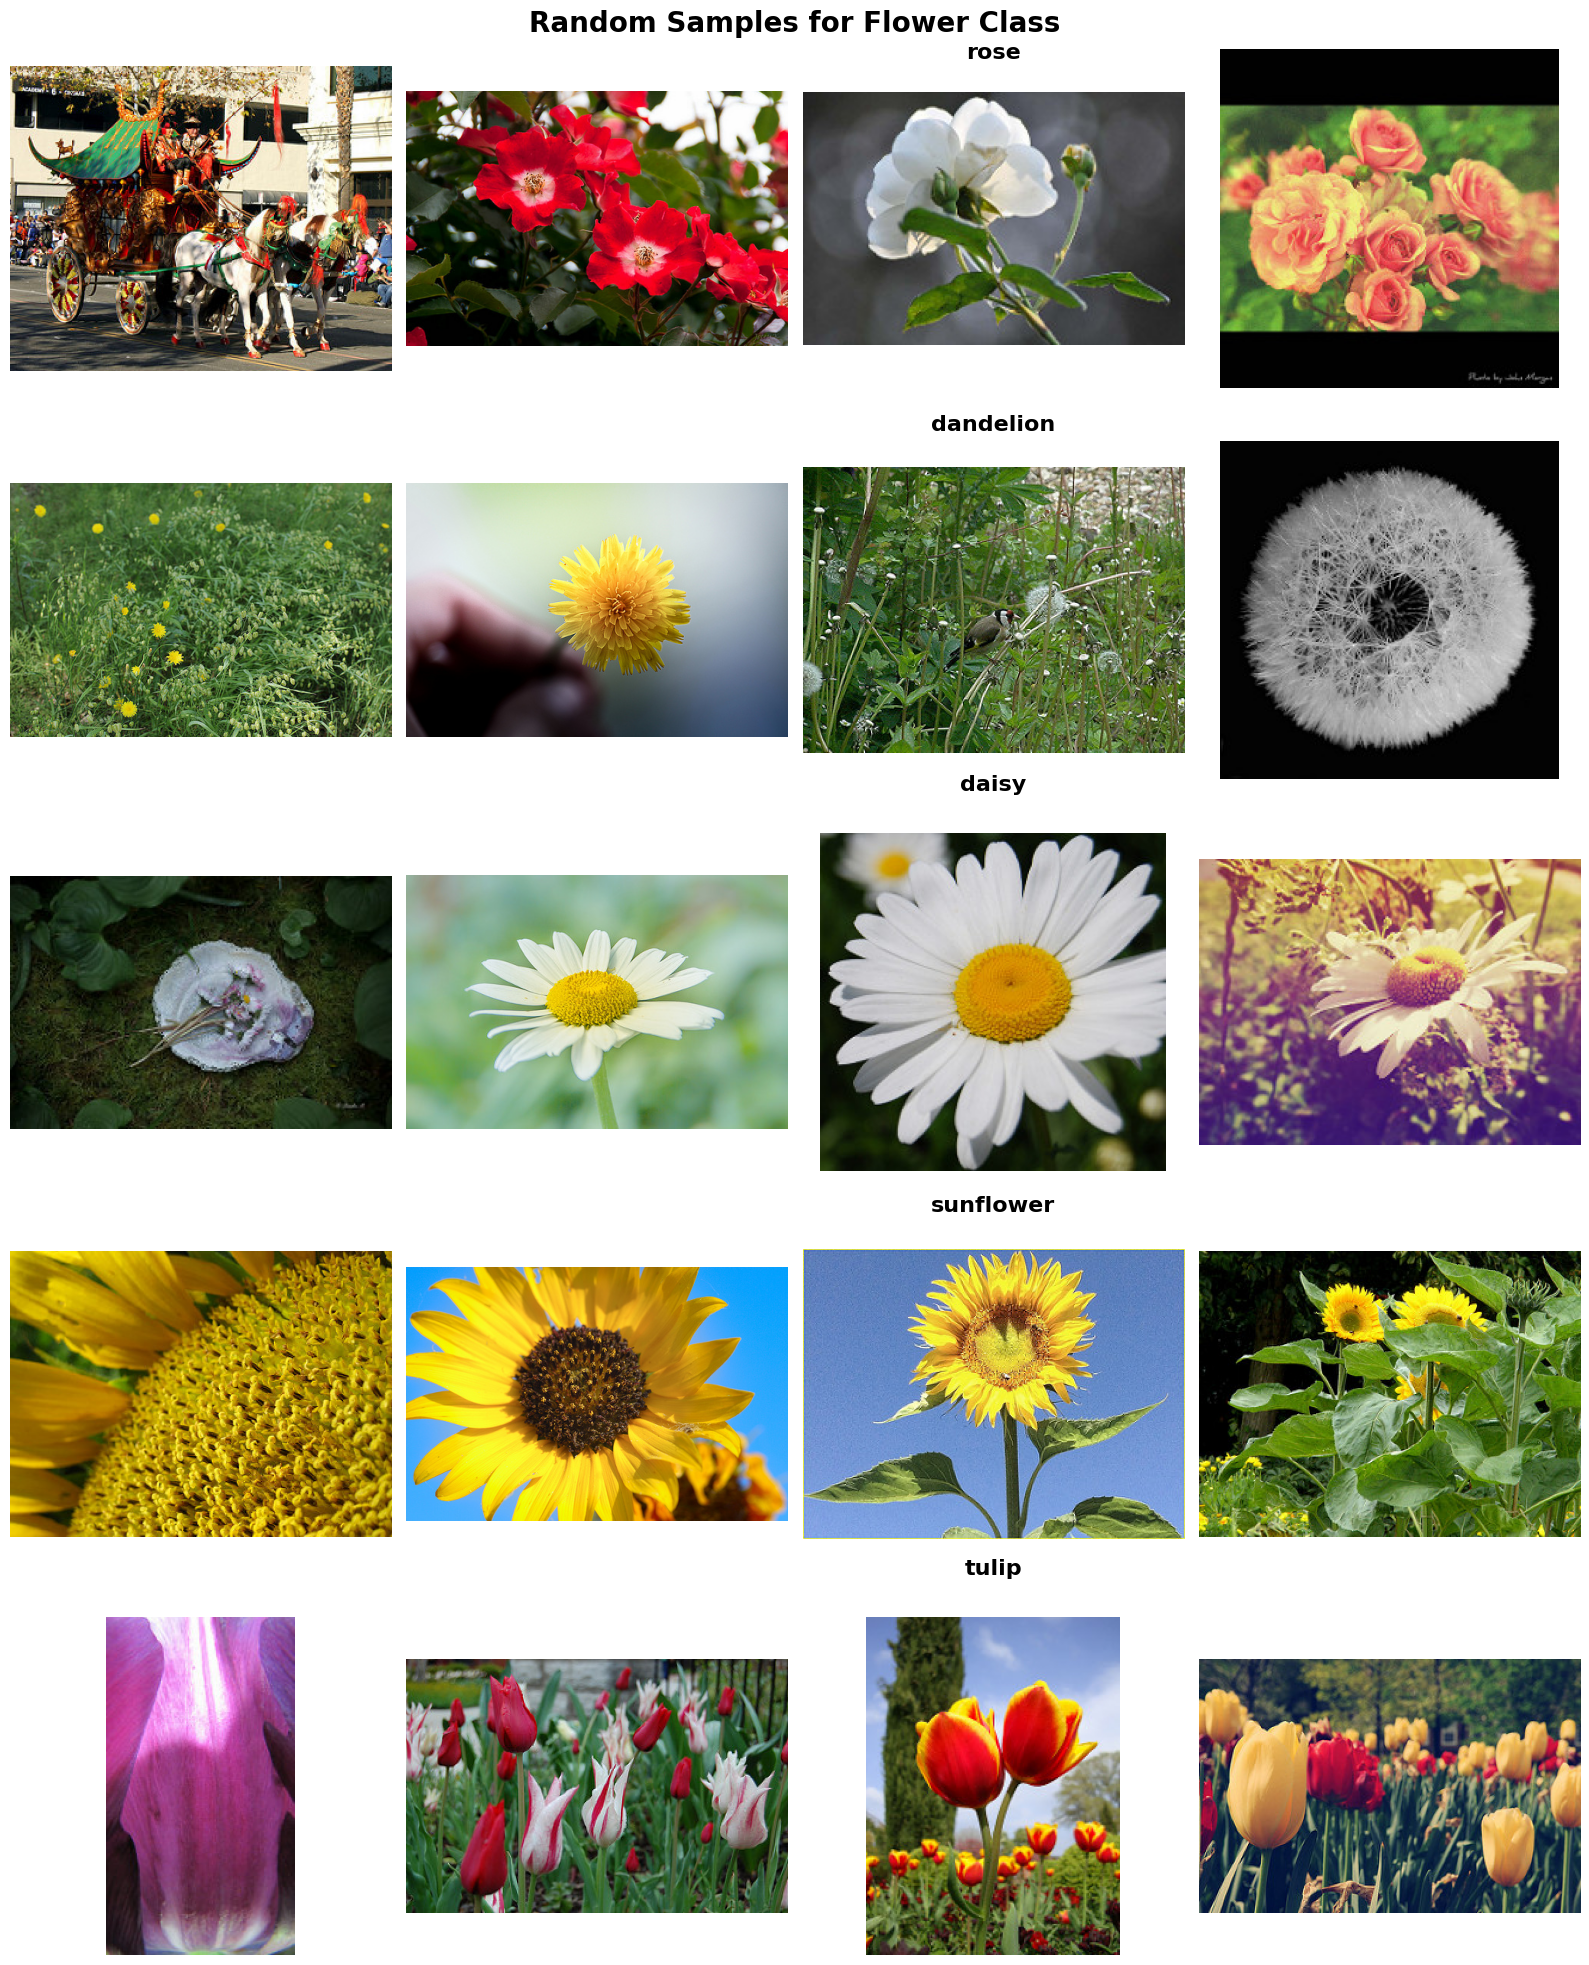

In [ ]:
from PIL import Image
import random
import os
import matplotlib.pyplot as plt

def random_files(folder_path, num_files=4):
    """Randomly sample files from a given folder."""
    files = os.listdir(folder_path)
    num_files = min(num_files, len(files))  # Ensure we don't sample more than available files
    sample_data = random.sample(files, num_files)
    return sample_data

def show_images_per_class(class_dirs, num_files=4):
    """
    Display random samples for each class in a grid with cleaner formatting.
    Args:
    - class_dirs: List of full paths to class folders.
    - num_files: Number of images to sample per class.
    """
    total_classes = len(class_dirs)
    fig, axes = plt.subplots(total_classes, num_files, figsize=(num_files * 4, total_classes * 4))
    fig.subplots_adjust(hspace=0.5)  # Add space between rows for class names

    for row, folder_path in enumerate(class_dirs):
        class_name = os.path.basename(folder_path)  # Extract class name from folder path
        file_sample = random_files(folder_path, num_files)

        for col, f in enumerate(file_sample):
            image_path = os.path.join(folder_path, f)
            img = Image.open(image_path)

            # Plot the image
            axes[row, col].imshow(img)
            axes[row, col].axis('off')

        # Add the class name centered above the row
        axes[row, num_files // 2].set_title(class_name, fontsize=16, fontweight='bold', y=1.1)

    plt.suptitle("Random Samples for Flower Class", fontsize=20, fontweight='bold')
    plt.tight_layout()
    plt.show()


show_images_per_class(classes, num_files=4)

In [ ]:
import shutil

root = "/content/"
folder_name = "preprocessed"
preprocessed_path = os.path.join(root, folder_name)

if os.path.exists(preprocessed_path):

    shutil.rmtree(preprocessQed_path)
    print(f"Folder '{folder_name}' has been reset (contents deleted).")


os.makedirs(preprocessed_path)
print(f"Folder '{folder_name}' created successfully.")

Folder 'preprocessed' created successfully.


In [ ]:
import os
import shutil
from PIL import Image

def is_valid_image(file_path):
    # Check extension first
    valid_extensions = (".jpg", ".jpeg", ".png", ".bmp")
    if not file_path.lower().endswith(valid_extensions):
        return False
    # Check if PIL can open
    try:
        with Image.open(file_path) as im:
            im.verify()
        return True
    except:
        return False

source_path = "/content/drive/MyDrive/Datasets/Flower"
destination_path = "/content/preprocessed/original"

if not os.path.exists(destination_path):
    os.makedirs(destination_path)

for folder_name in os.listdir(source_path):
    folder_src = os.path.join(source_path, folder_name)
    folder_dest = os.path.join(destination_path, folder_name)

    if os.path.isdir(folder_src):
        if os.path.exists(folder_dest):
            shutil.rmtree(folder_dest)
        os.makedirs(folder_dest)

        # Copy only valid images
        for file_name in os.listdir(folder_src):
            src_file = os.path.join(folder_src, file_name)
            if is_valid_image(src_file):
                shutil.copy(src_file, folder_dest)
            else:
                print(f"Skipping invalid file: {file_name}")


Skipping invalid file: dandelion_000085.png
Skipping invalid file: dandelion_000288.png
Skipping invalid file: dandelion_000690.png
Skipping invalid file: tulip_000251.png


In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

original_folder = "/content/preprocessed/original"
splitted_folder = "/content/preprocessed/splitted"

if not os.path.exists(splitted_folder):
    os.makedirs(splitted_folder)

classes = os.listdir(original_folder)


splits = ["train", "test", "validation"]

# Ensure 'train', 'test', 'validation' folders exist for each class
for class_name in classes:
    for split in splits:
        split_path = os.path.join(splitted_folder, split, class_name)
        if os.path.exists(split_path):
            shutil.rmtree(split_path)
            print(f"Folder '{split_path}' has been reset (contents deleted).")
        os.makedirs(split_path)
        print(f"Folder '{split_path}' created successfully.")

# Split data for each class
for class_name in classes:
    source_path = os.path.join(original_folder, class_name)
    all_files = os.listdir(source_path)

    # Split into train (70%), test (15%), and validation (15%)
    train_files, temp_files = train_test_split(all_files, test_size=0.3, random_state=42)
    test_files, val_files = train_test_split(temp_files, test_size=0.5, random_state=42)

    # Move files to respective folders
    for file in train_files:
        shutil.copy(os.path.join(source_path, file), os.path.join(splitted_folder, "train", class_name, file))

    for file in test_files:
        shutil.copy(os.path.join(source_path, file), os.path.join(splitted_folder, "test", class_name, file))

    for file in val_files:
        shutil.copy(os.path.join(source_path, file), os.path.join(splitted_folder, "validation", class_name, file))

    print(f"Class '{class_name}' split into train: {len(train_files)}, test: {len(test_files)}, validation: {len(val_files)}.")

Folder '/content/preprocessed/splitted/train/tulip' created successfully.
Folder '/content/preprocessed/splitted/test/tulip' created successfully.
Folder '/content/preprocessed/splitted/validation/tulip' created successfully.
Folder '/content/preprocessed/splitted/train/sunflower' created successfully.
Folder '/content/preprocessed/splitted/test/sunflower' created successfully.
Folder '/content/preprocessed/splitted/validation/sunflower' created successfully.
Folder '/content/preprocessed/splitted/train/daisy' created successfully.
Folder '/content/preprocessed/splitted/test/daisy' created successfully.
Folder '/content/preprocessed/splitted/validation/daisy' created successfully.
Folder '/content/preprocessed/splitted/train/rose' created successfully.
Folder '/content/preprocessed/splitted/test/rose' created successfully.
Folder '/content/preprocessed/splitted/validation/rose' created successfully.
Folder '/content/preprocessed/splitted/train/dandelion' created successfully.
Folder '/

In [ ]:
# -------------------------------------------------------
# 1. INSTALL & IMPORTS
# -------------------------------------------------------
# If you're in Google Colab, TensorFlow is usually pre-installed.
# Uncomment if needed to install it in some environments:
# !pip install tensorflow

import os
import shutil
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# -------------------------------------------------------
# 2. CUTMIX FUNCTION (OFFLINE, SAME-CLASS)
# -------------------------------------------------------
def offline_cutmix(img1, img2, alpha=1.0):
    """
    Applies a CutMix-like augmentation to two images *from the same class*.
    The label remains that of the first image's class, which is a compromise
    for offline folder-based augmentation.

    Args:
        img1, img2: NumPy arrays of shape (H, W, C).
        alpha: (Optional) Typically controls the area ratio in standard CutMix.
               Here, we'll pick the region size randomly, ignoring alpha if desired.
    Returns:
        A new image (NumPy array) that is partially from img1 and partially from img2.
    """
    h1, w1, _ = img1.shape
    h2, w2, _ = img2.shape

    # Random value from 0..1 to define area ratio (similar to drawing from Beta distribution in typical CutMix)
    lambda_val = np.random.beta(alpha, alpha) if alpha > 0 else 0.5
    # We can force lambda_val to be between .3 and .7 for more stable mixing
    lambda_val = max(min(lambda_val, 0.7), 0.3)

    # Use minimum height and width to ensure compatibility
    h = min(h1, h2)
    w = min(w1, w2)

    cut_rat = np.sqrt(1. - lambda_val)  # proportion of image to cut
    cut_h = int(h * cut_rat)
    cut_w = int(w * cut_rat)

    # Random center point, limited by minimum dimensions
    cx = np.random.randint(0, w)
    cy = np.random.randint(0, h)

    # Calculate box boundaries, ensuring they stay within image bounds
    x1 = np.clip(cx - cut_w // 2, 0, w)
    y1 = np.clip(cy - cut_h // 2, 0, h)
    x2 = np.clip(cx + cut_w // 2, 0, w)
    y2 = np.clip(cy + cut_h // 2, 0, h)

    # Make a copy so we don't overwrite the original
    new_img = np.copy(img1)

    # Resize img2 slice to match new_img slice dimensions if necessary
    img2_slice = img2[y1:y2, x1:x2, :]
    new_img_slice_shape = new_img[y1:y2, x1:x2, :].shape

    if img2_slice.shape != new_img_slice_shape:
        # Resize img2_slice to match if shapes are different
        # (this helps if img1 and img2 were transformed differently)
        try:
            img2_slice = tf.image.resize(img2_slice, new_img_slice_shape[:2]).numpy()
        except:
            # Fallback if tf.image.resize fails (e.g., due to empty image)
            img2_slice = np.zeros(new_img_slice_shape, dtype=new_img.dtype)

    # Place a patch from img2 into new_img
    new_img[y1:y2, x1:x2, :] = img2_slice
    return new_img

# -------------------------------------------------------
# 3. CONFIGURATION / PATHS
# -------------------------------------------------------
train_folder = "/content/preprocessed/splitted/train"      # Original training images
augmented_folder = "/content/preprocessed/train_augmented" # Destination for balanced/augmented images

# -------------------------------------------------------
# 4. RESET OR CREATE AUGMENTED FOLDER
# -------------------------------------------------------
if os.path.exists(augmented_folder):
    shutil.rmtree(augmented_folder)
    print(f"Folder '{augmented_folder}' has been reset (contents deleted).")
os.makedirs(augmented_folder)
print(f"Folder '{augmented_folder}' created successfully.")

# -------------------------------------------------------
# 5. BASE AUGMENTATION SETTINGS (ImageDataGenerator)
# -------------------------------------------------------
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode="nearest"
)

# -------------------------------------------------------
# 6. DETERMINE CLASS DISTRIBUTIONS
# -------------------------------------------------------
class_counts = {}
for class_name in os.listdir(train_folder):
    class_path = os.path.join(train_folder, class_name)
    if os.path.isdir(class_path):
        count = len(os.listdir(class_path))
        class_counts[class_name] = count

# Find the largest class
max_count = max(class_counts.values())
print("Class distribution before augmentation:", class_counts)
print(f"Target size for all classes: {max_count}")

# -------------------------------------------------------
# 7. AUGMENT UNDERREPRESENTED CLASSES (OFFLINE CUTMIX)
# -------------------------------------------------------
for class_name, count in class_counts.items():
    source_class_path = os.path.join(train_folder, class_name)
    target_class_path = os.path.join(augmented_folder, class_name)

    # Ensure the target class folder exists
    os.makedirs(target_class_path, exist_ok=True)

    # 7.1. Copy original images first
    for file_name in os.listdir(source_class_path):
        shutil.copy(
            os.path.join(source_class_path, file_name),
            os.path.join(target_class_path, file_name)
        )

    # 7.2. If class is underrepresented, augment more images
    if count < max_count:
        files = os.listdir(source_class_path)
        augment_count = max_count - count
        print(f"Augmenting class '{class_name}' with {augment_count} additional images.")

        for i in range(augment_count):
            # pick an image i from the same class
            img_i_name = files[i % count]
            img_i_path = os.path.join(source_class_path, img_i_name)

            # pick a random second image j from the same class
            img_j_name = random.choice(files)
            img_j_path = os.path.join(source_class_path, img_j_name)

            # Load them as arrays
            img_i = tf.keras.preprocessing.image.load_img(img_i_path)
            x_i = tf.keras.preprocessing.image.img_to_array(img_i)

            img_j = tf.keras.preprocessing.image.load_img(img_j_path)
            x_j = tf.keras.preprocessing.image.img_to_array(img_j)

            # -------------------------------------------------
            # 7.2.1: APPLY STANDARD TRANSFORMATIONS
            # -------------------------------------------------
            # We can apply the standard transforms to x_i and x_j individually
            x_i = x_i.reshape((1,) + x_i.shape)  # shape (1, H, W, C)
            x_j = x_j.reshape((1,) + x_j.shape)

            # Generate 1 augmented sample for x_i
            aug_i_batch = next(datagen.flow(x_i, batch_size=1))
            aug_i = aug_i_batch[0]

            # Generate 1 augmented sample for x_j
            aug_j_batch = next(datagen.flow(x_j, batch_size=1))
            aug_j = aug_j_batch[0]

            # -------------------------------------------------
            # 7.2.2: APPLY CUTMIX TO AUGMENTED IMAGES
            # -------------------------------------------------
            # Both images come from the same class => label remains class_name
            cutmix_img = offline_cutmix(aug_i, aug_j, alpha=1.0)

            # Construct a new augmented filename
            aug_img_name = f"cutmix_{i}_{img_i_name}"
            aug_img_path = os.path.join(target_class_path, aug_img_name)

            # Save the final CutMix result
            tf.keras.preprocessing.image.save_img(aug_img_path, cutmix_img)

print(f"Augmentation completed. Balanced dataset is located at: '{augmented_folder}'")


Folder '/content/preprocessed/train_augmented' created successfully.
Class distribution before augmentation: {'tulip': 688, 'sunflower': 513, 'daisy': 538, 'rose': 548, 'dandelion': 736}
Target size for all classes: 736
Augmenting class 'tulip' with 48 additional images.
Augmenting class 'sunflower' with 223 additional images.
Augmenting class 'daisy' with 198 additional images.
Augmenting class 'rose' with 188 additional images.
Augmentation completed. Balanced dataset is located at: '/content/preprocessed/train_augmented'


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_dir = "/content/preprocessed/train_augmented"
val_dir = "/content/preprocessed/splitted/validation"
test_dir = "/content/preprocessed/splitted/test"


target_size = (224, 224)
batch_size = 100


train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(
    rescale=1.0/255.0
)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode="categorical"
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode="categorical"
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)

print("Preprocessing completed.")

Found 3680 images belonging to 5 classes.
Found 651 images belonging to 5 classes.
Found 648 images belonging to 5 classes.
Preprocessing completed.


In [ ]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications import InceptionV3


base_model = InceptionV3(weights='imagenet', include_top=False)

# Freeze the base model layers
base_model.trainable = False

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation="relu")(x)
output = Dense(5, activation="softmax")(x)

# Compile the model
model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

print("Model created successfully.")

Model created successfully.


In [ ]:
!nvidia-smi

Thu Feb 27 08:42:14 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   66C    P0             28W /   70W |    8310MiB /  15360MiB |      3%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Callbacks for saving the best model and early stopping
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss'),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1) # Changed the filepath to best_model.keras
]

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=40,
    callbacks=callbacks
)

print("Model training completed.")

Epoch 1/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.4873 - loss: 1.3588 - val_accuracy: 0.7189 - val_loss: 0.6825 - learning_rate: 0.0010
Epoch 2/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.7666 - loss: 0.6380 - val_accuracy: 0.7957 - val_loss: 0.5483 - learning_rate: 0.0010
Epoch 3/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.8055 - loss: 0.5413 - val_accuracy: 0.8126 - val_loss: 0.4899 - learning_rate: 0.0010
Epoch 4/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.8226 - loss: 0.4977 - val_accuracy: 0.8280 - val_loss: 0.4694 - learning_rate: 0.0010
Epoch 5/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.8242 - loss: 0.4786 - val_accuracy: 0.8126 - val_loss: 0.4799 - learning_rate: 0.0010
Epoch 6/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.8315 - loss: 0.4509 - val_accuracy: 0.8249 - val_loss: 0.4847 - learning_rate: 0.0010
Epoch 7/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.8451 - loss: 0.4323 - val_accuracy: 

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.8839 - loss: 0.3328
Test Loss: 0.3570348620414734
Test Accuracy: 0.8734567761421204


In [ ]:
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]
train_loss = history.history['loss'][-1]
val_loss = history.history['val_loss'][-1]

# Calculate the gaps
accuracy_gap = abs(train_acc - val_acc)
loss_gap = abs(train_loss - val_loss)

print(f"Accuracy Gap: {accuracy_gap:.2f}")
print(f"Loss Gap: {loss_gap:.2f}")

Accuracy Gap: 0.02
Loss Gap: 0.06


In [ ]:
base_model.trainable = True

# For instance, freeze all but the last 20 layers:
for layer in base_model.layers[:-20]:
    layer.trainable = False

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

callbacks = [
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-7),
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
]

history_finetune = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=callbacks
)


Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.8607 - loss: 0.4050 - val_accuracy: 0.8495 - val_loss: 0.3891 - learning_rate: 1.0000e-05
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.8840 - loss: 0.3669 - val_accuracy: 0.8510 - val_loss: 0.3956 - learning_rate: 1.0000e-05
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.8803 - loss: 0.3497 - val_accuracy: 0.8510 - val_loss: 0.3921 - learning_rate: 1.0000e-05
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.8944 - loss: 0.3318 - val_accuracy: 0.8556 - val_loss: 0.3877 - learning_rate: 1.0000e-05
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.8868 - loss: 0.3319 - val_accuracy: 0.8587 - val_loss: 0.3876 - learning_rate: 1.0000e-05
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.8994 - loss: 0.3082 - val_accuracy: 0.8541 - val_loss: 0.3862 - learning_rate: 1.0000e-05
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.8852 - loss:

In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 710ms/step - accuracy: 0.8957 - loss: 0.3148
Test Loss: 0.32750168442726135
Test Accuracy: 0.8904321193695068


In [ ]:
train_acc = history_finetune.history['accuracy'][-1]
val_acc = history_finetune.history['val_accuracy'][-1]
train_loss = history_finetune.history['loss'][-1]
val_loss = history_finetune.history['val_loss'][-1]

accuracy_gap = abs(train_acc - val_acc)
loss_gap = abs(train_loss - val_loss)

print(f"Accuracy Gap: {accuracy_gap:.2f}")
print(f"Loss Gap: {loss_gap:.2f}")

Accuracy Gap: 0.04
Loss Gap: 0.09


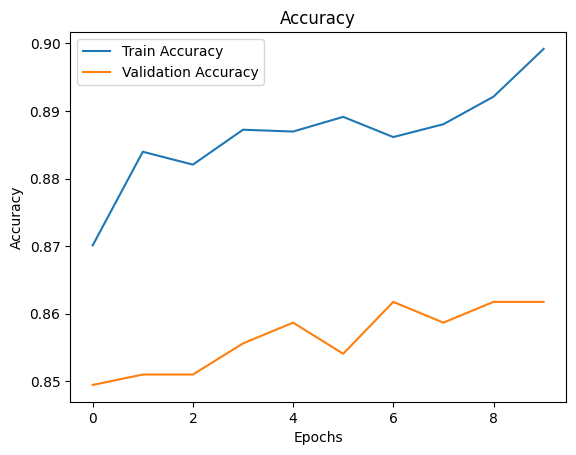

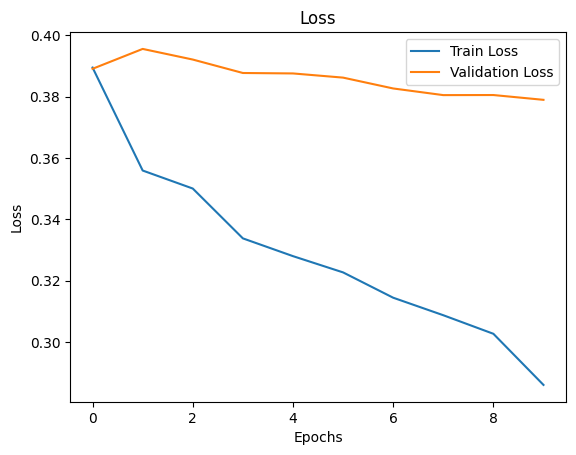

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_finetune.history['accuracy'], label='Train Accuracy')
plt.plot(history_finetune.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

plt.plot(history_finetune.history['loss'], label='Train Loss')
plt.plot(history_finetune.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [ ]:
model.save("fine_tuned_model.h5")
print("Model saved successfully as 'fine_tuned_model.h5'")

Model saved successfully as 'fine_tuned_model.h5'


In [ ]:
model.save_weights("fine_tuned_weights.weights.h5")
print("Model weights saved successfully as 'fine_tuned_weights.weights.h5'")

Model weights saved successfully as 'fine_tuned_weights.weights.h5'
